## A quick introduction to the theory behind deep learning (and machine learning in general)

Machine learning is a branch of computer science dedicated to the process of learning from data in such a way
that it can be applied to solve new problems via prediction.

In my opinion some key tenets of machine learning include:

1) **Trash in, trash out**: Good data makes good models that actually provide useful results. There is a whole other branch of computer science that deals with cleaning and preprocessing data, but as an ML engineer you need to be able to understand and apply some of these techniques as well.

2) **Good models are not necessarily the ones that are the most complex**: Suppose the problem of winning a game of tictactoe. From a human perspective, the model or the sequence of decisions in a simple game of tic-tac-toe are not all that hard to realize, therefore it does not make sense to overanalyze the model and try to optimize it beyond a certain point. However, a game like chess which involves a much more complex decision tree, requires a more complex or 'deep' model.

**Your objective is to find the appropriate model, not the most complex model.**

3) **Understanding the math is not neccesary to create the model, but it is necessary to engineer it**: If you want to create a model for a relatively common task, there are several resources online that offer plug and play solutions. However, my goal is to examine the math behind deep learning that allows greater analysis of the models and their limitations. **You should be comfortable with linear algebra, basic calculus, and statistics but I will try my best to fill in the gaps where I can.**

---

## Generative Modelling and Deep Learning

Machine Learning is the more generalized field which is composed of various techniques including: linear regression, logistic regression, neural networks, etc.

- Some of these techniques, specifically neural networks, fall in to the realm of deep learning.

**The main idea behind deep learning is to create an idea which can correct its own errors through iteration, whereas other forms of machine learning may require human intervention to learn.**

As a result deep learning can be used to identify patterns within a dataset or create new data from existing data. We examine the patterns by looking at the model after it has finished training. Looking a model to understand what it tells us about the dataset requires statistical analysis in the form of graphs, visual matrices, e.t.c.

---

## Why use Python?

Python is considered the goto language for any mathematical/statistical problem that requires coding because of a couple of key features.

1) **Simple syntax**: You can write code in Python akin to natural plain english (no need for types, easy extensibility, e.t.c). This makes understanding the code much easier for a non-technical observer.

2) **Statistical libraries**: Python has a rich set of libraries for doing statistical analysis that stick with simple syntax and focus on ease of use.

3) **Speed**: People argue that Python is a bad language to use for deployed applications because it is interpreted as opposed to being compiled. (What this means that is Python has to go through one more layer of translation before it becomes assembly (compared to C and its derivatives)), but the Python community has continuously been improving the speed of Python with each new patch and I am of the opinion that for an individual or a small group it is plenty fast for any use case.

Lets begin with the setup 

The code below will automatically install all needed resources :smile: This should take a few minutes with good internet connection.

In [5]:
import importlib
import subprocess
import sys

def install_and_import(package):
    """
    Installs and imports a package, if it is not already installed.

    Args:
        package (str): The name of the package to install and import.
    """
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} not found, installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        importlib.import_module(package)
        print(f"{package} has been installed.")

def install_tensorflow():
    try:
        # Attempt to run 'nvidia-smi' to check for GPU presence
        subprocess.check_call(['nvidia-smi'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        print("GPU detected, installing TensorFlow with GPU support...")
        tensorflow_package = 'tensorflow'  # or 'tensorflow==2.x' for specific version
    except subprocess.CalledProcessError:
        # 'nvidia-smi' not found or no NVIDIA GPU detected (this part is defunct as TF no longer has separate versions)
        print("No GPU detected, installing TensorFlow CPU-only version...")
        tensorflow_package = 'tensorflow'

    # Install TensorFlow using pip
    subprocess.check_call([sys.executable, "-m", "pip", "install", tensorflow_package])
    print(f"{tensorflow_package} has been installed.")


# List of needed packages
packages = ['numpy', 'pandas', 'matplotlib', 'sklearn']

# Install and import each package
for package in packages:
    install_and_import(package)
    
# Install TensorFlow
install_tensorflow()
    


numpy is already installed.
pandas is already installed.
matplotlib is already installed.
sklearn is already installed.
GPU detected, installing TensorFlow with GPU support...
tensorflow has been installed.


## The Mathematical Foundations of Deep Learning: Statistics

What you should be asking yourself is: **How exactly does a computer 'learn'?**

- Learning involves being corrected, often by being shown the correct answers.

- Learning means finding your way to the correct answer through trial and error, the process is *not* instant.

Lets use some basic statistics to understand the process of learning.

---

Ex: Suppose a basic test consisting of 10 true or false questions. Suppose a computer randomly guesses on the test.

- Assuming several thousand tests with randomly chosen questions and several thousand attempts by the computer, what is the most likely percentage of questions answered correctly? Intuitively it is 50%, but lets actually put this to the test!

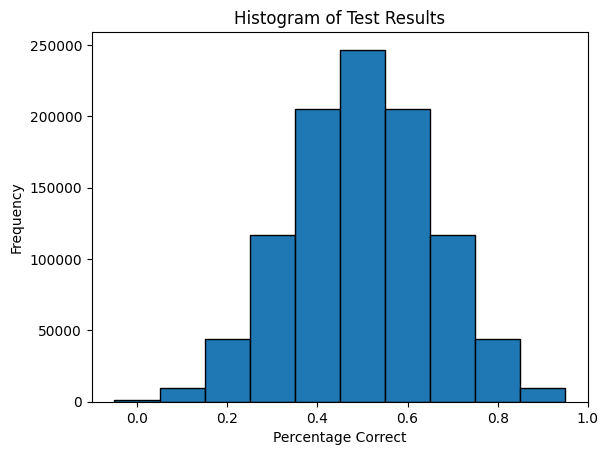

Percentage Correct for single test of size 10: 0.501


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_test(size: int):

    # Generate a test of the specified size with either 0s or 1s (0 means correct answer was False, 1 means correct answer was True)
    test = np.random.randint(2, size=size)

    return test

def try_test(test: np.ndarray):
    
    # For each question on the test, choose an answer randomly (0 or 1), and tally up the number of correct answers
    correct = 0
    for question in test:
        answer = np.random.randint(2)
        if answer == question:
            correct += 1
    
    # Return the percentage of correct answers
    return correct / len(test)

def main():
    
    # Generate 10000 tests of size 10
    tests = [generate_test(10) for _ in range(1000000)]
    
    # Try each test and record the results
    results = [try_test(test) for test in tests]
    
    # Use matplotlib to plot the results as a histogram
    plt.hist(results, bins=np.arange(-0.05, 1.05, 0.1), edgecolor='black')
    plt.xlabel('Percentage Correct')
    plt.ylabel('Frequency')
    plt.title('Histogram of Test Results')
    plt.show()
    
    # Generate a single test of size 10000
    test = generate_test(10000)
    
    # Try the test and record the result
    result = try_test(test)
    
    # Print the result
    print(f"Percentage Correct for single test of size 10: {result}")
    
    
    return
    
if __name__ == '__main__':
    main()


After running the code above, our intuition is validated, the most common outcome is indeed 50% correct!

However if you know enough statistics, this answer should have been evident enough!

What we ran is a bernoulli test, where the answer is either 0 or 1, several times. This generates a **binomial distribution**,
which is the distribution of the number of successes in the several trials.

The binomial distribution is very common in statistics and understanding it is crucial to understanding the theory behind **classification models** which are models that are used to identify whether an item is or is not part of a certain category.

The mean and variance of the binomial model are:

- Mean: $n \times p$
- Variance: $n \times p \times (1 - p)$

where $n$ is the number of trials and $p$ is the probability of success.

The graph depicts a binomial distribution. A single test of 10000 questions would be a single simulation (one data point, not enough to form a binomial distribution). Several tests of 10 questions would be several binomial trials with 10 trials each which form a binomial distribution.

In most contexts you will see a binomial distribution, and note that one distribution includes several binomial distributions.

**Now based of this model, if we had 10000 trials and a probability of success of 0.5, the mean would be 5000 but does the graph reflect this? (This is not a trick question 😉)**

<details>
    <summary>Click here for the answer</summary>
    <p>The graph does in fact prove this. Remember that the y-axis is the frequency, not the mean value itself. The mean value would be 5000 (which corresponds with 0.5 on the x-axis). You should be able to see that the mean (average) indeed lands in that bar which is the center of the distribution.</p>
</details>



## The Mathematical Foundations of Deep Learning: Linear Algebra

The process of intepreting data involves assigning importance to various observations. Perhaps you don't understand what linear algebra is, but let me catch you up to speed.

Lets start from the very basics:

$$y = mx + b$$

This is the form of a line on a 2D graph with slope $m$ and intercept $b$ that we should know from grade school.

- Slope: $m$ is a weight that describes the steepness of the line
- Intercept: $b$ is the y-intercept of the line that describes the initial position of the line when the input (x) is 0.

Now lets imagine a 3D graph:

<img src="./media/basic_3d_graph.png" alt="drawing" width="400"/>

Each point in the 3D space is reachable from the origin via an arrow from the origin to the point.

---

### Vectors

That arrow is called the vector of that point. If you think about it, the normal Cartesian plane's coordinate system is actually
a vector space as well! Because what is (0,2), if not the location 2 units above the origin?

However in higher dimensional spaces, the vectors are not just 2D, they can be 3D, 4D, etc. but its best to
visualize them via a 3D graph.

Vector notation can vary based on who you ask but some typical notation styles are:


$$\underline{v} = (x_1, y_1, z_1)$$

or

$$\hat{v} = (x_1, y_1, z_1)$$

or

$$\vec{v} = (x_1, y_1, z_1)$$

or

$$\dot{v} = (x_1, y_1, z_1)$$

Do note that some people, especially in math contexts like using $<$ and $>$ in place of the parentheses.
For me I prefer this as my notation:

$$\vec{v} = (x_1, y_1, z_1)$$

Vectors are the core mathematical building block of linear algebra and consequently machine learning. I think its a fair
question to wonder why that is the case!

In the context of everyday life, many objects can be quantified as vectors.

- Rectangular boxes can be clasified by their length, width, and height ($\vec{v} = (l, w, h)$).
- A human can be described as a vector of their height, weight, and age ($\vec{v} = (h, w, a)$).
- An image can be described as a vector of its height and width ($\vec{v} = (h, w)$).

e.t.c

Vectors can be thought of as descriptors of items. Big tech companies have stored data of their products, employees, and customers
all in the form of several hundred dimensional vectors where each component describes a different aspect of said thing.

Linear algebra is a the process of analyzing the relationships between vectors to quantify the relationships between the
real world objects they describe. If two people like the same movie, live close by, and have the same last name, how likely
are they to be from the same family? How likely are they to be friends? While these questions seem trivial, using vector
arithmetic on the data of these people can be quite useful in coming to the final answer.

One last thing, we can expand the basic concept of the distance formula into several dimensions!

Hopefully we know the basic distance formula for points in 2D:

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

<img src="./media/Pythagorean_Distance.png" alt="drawing" width="400"/>

**In 3D we can apply a very similar formula that simply adds another dimension**

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}$$

Note that vectors in our context are strictly defined as starting from the origin. This means that the starting point is always $\vec{v} = (0,0,0)$

This brings us to the idea of the magintude of a vector which is notated as $|\vec{v}|$.

**The magnitude of the vector is essentially its length**, it leverages the distance formula but plugs in 0 as the starting point.

$$|\vec{v}| = \sqrt{(v_1 - 0)^2 + (v_2 - 0)^2 + (v_3 - 0)^2} = \sqrt{v_1^2 + v_2^2 + v_3^2}$$

Note that for higher dimensions the formula continues as you would expect it to.

**For a vector v of dimension n, the magnitude is $\sqrt{v_1^2 + v_2^2 + v_3^2 + ... + v_n^2}$**

Note that two vectors of different lengths can point in the same direction, so how can we confirm this mathematically
even if its visually apparent?

**A unit vector is a vector that has a magnitude of 1. If two vectors can be used to find the same unit vector, then both point in the same direction!**

Formula for unit vector v, by using some vector u:

$$\hat{v} = \frac{u}{|\vec{u}|}$$

Ex: Prove that $\vec{v_1} = (2, 4, 6)$ and $\vec{v_2} = (3, 6, 9)$ point in the same direction.

Unit vector from $v_1$: $\frac{(2, 4, 6)}{\sqrt{2^2 + 4^2 + 6^2}} = \frac{(2, 4, 6)}{\sqrt{56}} = (\frac{2}{\sqrt{56}}, \frac{4}{\sqrt{56}}, \frac{6}{\sqrt{56}})$

Unit vector from $v_2$: $\frac{(3, 6, 9)}{\sqrt{3^2 + 6^2 + 9^2}} = \frac{(3, 6, 9)}{\sqrt{126}} = (\frac{3}{\sqrt{126}}, \frac{6}{\sqrt{126}}, \frac{9}{\sqrt{126}})$

You can plug each component into a calculator and see that both unit vectors are identical.

---

### Dot Product

The dot product of two vectors is defined as:

$$\vec{u} \cdot \vec{v} = u_1v_1 + u_2v_2 + u_3v_3$$

where $u_1, u_2, u_3$ are the components of the first vector, and $v_1, v_2, v_3$ are the components of the second vector.

Ex: $\vec{u} = (1, 2, 3)$ and $\vec{v} = (4, 5, 6)$

$$\vec{u} \cdot \vec{v} = 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 32$$

Note that we can expand this multiplication for n dimensions as well, I just chose 3 for this example.

There is also a less commonly used geometric formula for the dot product which involves the magnitude of both vectors and the angle between them.

$$\vec{u} \cdot \vec{v} = |\vec{u}||\vec{v}|\cos(\theta)$$

Note that the presence of the cosine function allows us to find properties of the dot product such as if the angle between the two vectors is perpendicular (90 degrees) then the dot product is always 0.

---

### Cross Product

The cross product of two vectors is defined as:

$$\vec{u} \times \vec{v} = (u_2v_3 - u_3v_2, u_3v_1 - u_1v_3, u_1v_2 - u_2v_1)$$

However since we can be working with several dimensions, you can imagine this formula gets more complicated as the dimension increases.

So instead we rely on the geometric formula which uses the magnitude of both vectors and the angle between them.

$$\vec{u} \times \vec{v} = |\vec{u}||\vec{v}|\sin(\theta) \hat{n}$$

Where $\theta$ is the angle between the two vectors and $\hat{n}$ is the unit vector is the direction
perpendicular to the two vectors. **Note that the crossproduct results in a new vector, not a scalar.**

However, the presence of the trignometric function allows us to find properties of the cross product
(ex. if the vectors are parallel then the cross product is always 0).

---

## Combining Our Knowledge

Now suppose we want to create a 3D line with some slope and intercept. How could we do so? Well y was our height in the 2D model, but lets make z the output of our line in this model.

$$z = m(x, y) + b$$

Where $(x,y)$ is some sort of slope vector?

Well while the idea is correct, lets also consider that x and y may each have different weights.

$$z = (m_1, m_2)(x_1, y_1) + b$$

Now wait a second, how do I go about multiplying these two vectors together, and will that multiplication
result in a single number (also called a scalar, as opposed to a vector)?

**In linear algebra vectors can be multiplied in two ways: dot product and cross product, but we want to use the cross product whenever we are looking for a scalar output!**

$$z = (m_1, m_2) \cdot (x_1, y_1) + b$$

**In the context of machine learning we often call the first vector a weight vector and the second vector an input vector and for further simplicity we note that the 'b' term can be sort of integrated into both vectors.**

$$z = (m_1, m_2, 1) \cdot (x_1, y_1, b) = m_1x_1 + m_2y_1 + b$$

Now we have this model in place, but note that the input is 2D (x and y) and the output is 1D (z).

**In machine learning the input is often several dimensions and the output is usually a single dimension.**

Suppose we keep z as the output variable, but instead of using x and y as representing dimension 1 and 2 respectively, we use a weight vector where $x_1$ is the first dimension, $x_2$ is the second dimension, e.t.c. And instead of using m for the weights, lets use $w$ for the weights.

Then our final model is:

$$z = (w_1, w_2, w_3, ..., w_n, 1) \cdot (x_1, x_2, ..., x_n, b) = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

Each weight, $w_i$, is associated with a single attribute, $x_i$, and the bias is intergrated into the model via the last terms in each vector!

I can demonstrate this final model in Python using vector operations provided by numpy:

In [8]:
def main():
    
    # Create a vector of random weights between -1 and 1 with length 11 (10 inputs + 1 bias)
    weights = np.random.uniform(-1, 1, 11)
    
    # Create a vector of random inputs between 0 and 1 with length 11 (last 'weight' will just be 1)
    inputs = np.random.uniform(0, 1, 10)
    # Append 1 to the inputs
    inputs = np.append(inputs, 1)
    
    # Calculate the output (z = w * x)
    output = np.dot(weights, inputs)
    
    # Print the weights
    print(f"Weights: {weights}")
    
    # Print the inputs
    print(f"Inputs: {inputs}")
    
    # Print the output
    print(f"Output: {output}")
    
    return

if __name__ == '__main__':
    main()

Weights: [ 0.59788604  0.59088232 -0.18071449  0.21099006  0.65972048 -0.21474088
  0.591782    0.97050806  0.81359229 -0.1314887  -0.38620124]
Inputs: [0.46017845 0.30661591 0.51656821 0.10892371 0.14412319 0.13529178
 0.31837113 0.41162137 0.20790602 0.56250789 1.        ]
Output: 0.7488412188573592


## The Mathematical Foundations of Deep Learning: Calculus

Now that we have obtained a solid model for understanding the relationships between some input data the importance we assign to each datapoint (via the weight matrix), we can try retooling this model through calculus.

$$Z = W \cdot X$$

Where W is the weight matrix and X is the input vector.

Note that Z is a single prediction based on a single weight vector and input vector.

**What is our objective with machine learning in the simplest form?**:

**It is to find a model that best fits all the data points, i.e. the line of best fit**.

Now in two dimensions a line is a line in the traditional sense: $y = mx + b$

But our model describes the "lines" of best fit analogy in several dimensions. In 3D space, instead of a line we have a plane or surface of best fit. In 4D space, well honestly its hard to visualize but it would be a sort of hyperplane of best fit.

Even if we cannot visualize it, should you have blind faith this model does indeed draw a line / plane / whatever from the data
that makes a model of best fit? No! Lets try to explain it for our sake.

Lets proceed with a couple of assumptions:

1) The data given to us is labeled. This means that it has both input and output data, **our goal is to take in the input data and create predictions for what the output data should be. Then we compare this prediction with the actual output data to get a sense of how accurate our model is.**

2) $\hat{Y}$ is the predicted output, and $Y$ is the actual output provided by the data. For this to work, we must assume that our data is one-one. For any particular set of inputs there is only one output. In other words, if there should be no case where one state of inputs corresponds to multiple outputs as this implies a many-one relationship.

$$\hat{Y} = W \cdot X$$

Our goal is to minimize the error between our predictions and the actual output data.

The error at each data point $i$ can be given as:

$$Y_i - \hat{Y_i}$$

Note that the sign of this error can be either positive or negative but for reasons that become more clear later, we want our error to be strictly positive.

We can accomplish this in two ways: use absolute error or use squared error.

1) $| Y_i - \hat{Y_i} |$
2) $(Y_i - \hat{Y_i})^2$

While either option is equally viable, we tend to use the squared error as convention.

Suppose there are n datapoints in the dataset, then the sum of the squared errors is:

$$\sum_{i=1}^n (Y_i - \hat{Y_i})^2$$

But what is more important to us is the average of the squared errors. Note that to get the average from the sum, we can simply divide by the number of datapoints: n.

$$\frac{\sum_{i=1}^n (Y_i - \hat{Y_i})^2}{n}$$

This is more commonly written as:

$$MSE = \frac{1}{n} \cdot \sum_{i=1}^n (Y_i - \hat{Y_i})^2$$

This is the **mean squared error**.

### Applying Calculus: Derivatives

The function that we came up with in the prior section is called the **loss function** and it is used to measure the error between our predictions and the actual output data. The goal in all ML problems is to find the set of weights that minimize the loss.

*Note: some texts call the loss function the **cost function** or the **fitness function***

From calculus we know that to find the minimum value of any function, we need to first find the derivative of the function. The values where the derivative is 0 are extrema: points where the function reaches a peak or valley.

For a simple line in a 2D plane, there is no extrema, but our objective is to find any curve or shape, not just a line.

We also know that for functions of several variables we can take partial derivatives:

$$z = x^2 + y^2$$

$$\frac{\partial z}{\partial x} = 2x, \;\; \frac{\partial z}{\partial y} = 2y$$

Intuitively if we can find a point where both derivatives are 0, that point is an extrema. For the function given above, one such point would be (x = 0, y = 0) which is the origin. Now this point is not guaranteed to minimize the function, but it is guaranteed to be an extrema (either locally a minimum or a maximum). Lets confirm this visually:

<img src="./media/basic_3d_function.png" alt="drawing" width="400"/>

We can see that z is indeed minimized at (x = 0, y = 0).

Note that in this case z = 0 at the origin, but this is not necessarily the case.

If our function was instead: $z = x^2 + y^2 + 1$, then the minimum would occur at (x = 0, y = 0), but the minimum value would be 1.

**Our goal is to minimize the function, but that does not mean that we are looking for points where the function is equal to 0, but rather we are attempting to find the point where the function is as negative as possible. The function may have reached a minimum when its gradient is 0.**

For a function of several variables: $x_1, x_2, x_3, \ldots$, we can represent all the possible partial derivatives of the function in a special vector called the **gradient**.

$$\nabla z = (\frac{\partial z}{\partial x_1}, \frac{\partial z}{\partial x_2}, \ldots)$$

The line above is read as: the gradient vector of $z$ is the vector of partial derivatives of z with respect to $x_1, x_2, x_3, \ldots$.

Now in the context of machine learning, our function of interest is the loss function: $Z = W \cdot X = w_1x_1 + w_2x_2 + \ldots + b$

$$\nabla Z_w = (\frac{\partial Z}{\partial w_1}, \frac{\partial Z}{\partial w_2}, \ldots)$$

**Why do we take the derivative with respect to weights and not $x_1, x_2, x_3, \ldots$?:**

I agree, this seems like a contradiction. If $x_1, x_2, ...$ are the input variables, why do we concern ourselves with the weights?

Consider the function: $y = 3x_1 + 2x_2$

Note that the shape of the function is closely linked to the coefficents (weights) associated with $x_1$ and $x_2$.
If we want to change this function to fit some set of data more closely, what we want to be doing is changing the weights, such that for any input combination of $x_1$ and $x_2$ the output from this function is as close to the actual output as possible. (in other words we want to make the graph of best fit by tuning the weights).

**Therefore for our loss function we should construct this gradient with the assumption that we will be changing the weights, not the inputs (the inputs will be fixed based on the dataset we are using).**

Now going back to the loss function: $Z = w_1x_1 + w_2x_2 + \ldots + b$

$$\nabla Z_w = (\frac{\partial Z}{\partial w_1}, \frac{\partial Z}{\partial w_2}, \ldots)$$

We can easily calculate the gradient to be a vector of all the features (inputs) because taking the derivative with respect to a single weight results in one term that needs to be calculated and the rest go to 0:

$$\frac{\partial Z}{\partial w_1} = \frac{\partial(w_1x_1 + w_2x_2 + \ldots)}{\partial x_1} = x_1 + 0 + 0 + \ldots = x_1$$

By the same process:

$$\frac{\partial Z}{\partial w_2} = \frac{\partial(w_1x_1 + w_2x_2 + \ldots)}{\partial x_2} = 0 + x_2 + 0 + \ldots = x_2$$

e.t.c.

As a result the gradient vector is: $(x_1, x_2, \ldots)$

$$\nabla Z_w = (x_1, x_2, \ldots)$$

---

### The Gradient Descent Algorithm

Now that we have established what a gradient is, how does it provide useful information to help us minimize our function?

Well suppose that you are standing on some hill, where your height on the hill (y) relative to the distance from your camp (x), is given by: $y = x^2$

The gradient of this function is a single value: $2x$

This gradient tells us quite a lot about the graph:

- For $x < 0$, the gradient is negative, meaning the hill is descending
- For $x > 0$, the gradient is positive, meaning the hill is ascending
- For $x = 0$, the gradient is 0, indicating either a minimum or maximum value of y.

Suppose I start of at x = -1. If I have no idea of the shape of the graph (lets say I am blindfolded), but I know the gradient at my point, how can I use it to move to lower ground?

Step 1:

Lets try evaluating the gradient at x = -1: $2(-1) = -2$. The gradient is negative at x = -1, if I were to move in the negative x-direction (in the same direction as the gradient) I would be climbing up the hill. This is the opposite of what I want. If I were to move in the positive x-direction (in the opposite direction of the gradient) I would be descending the hill, which is what I want!

Lets multiply the gradient by an arbitrary value, lets say 0.25, and then use it to move in the correct direction.

$$x_{new} = x_{old} - 0.25 * (-2) = -1 - 0.25 * (-2) = -0.5$$

Step 2:

Once again evaluating the gradient at x = -0.5: $2(-0.5) = -1$. The gradient is negative at x = -0.5, if I were to move in the same direction as the gradient (towards negative x) I would be ascending the hill. This is the opposite of what I want. If I were to move in the opposite direction of the gradient (towards positive x) I would be descending the hill, which is what I want!

Once again lets perform the same process to use the gradient to move in the correct direction.

$$x_{new} = x_{old} - 0.25 * (-1) = -0.5 - 0.25 * (-1) = -0.25$$

Step 3:

$$x_{new} = x_{old} - 0.25 * (-0.5) = -0.25 - 0.25 * (-0.5) = -0.125$$

Step 4:

$$x_{new} = x_{old} - 0.25 * (-0.25) = -0.125 - 0.25 * (-0.25) = -0.0625$$

...

With enough steps the difference between $x_{new}$ and $x_{old}$ becomes insignificant,
indicating that we are not really moving around a whole lot. We can apply some threshold
that stops the algorithm if a certain condition is met (ex. $x_{new} - x_{old} < 10^{-6}$).

<img src="./media/gd_1.png" alt="drawing" width="400"/>

The algorithm we came up with can be formalized mathematically as:

$$x_{new} = x_{old} - \alpha \nabla f(x_{old})$$

Where $\alpha$ is some chosen step size, **often called the learning rate in the context of ML**. 

This is called the gradient descent algorithm (we use the gradient to descend the curve) and it can be expanded into any number of dimensions, not just 2D, but we will cover that later.

**Note that whatever value of x we end up with after sufficent iterations will be practically identical to the $x = 0$ (it will have succesfully found the local minimum).**

FAQ:

---

**Can this algorithm fail? Yes of course!**

What if our chosen step size was something like 10 instead of 0.25?

Then at step 1:

$$x_{new} = -1 - 10 * (-2) = 19$$

Now with this massive step size we skipped over the minimum of $x = 0$ entirely. But from the perspective of the climber, we wouldn't really care because the climber simply follows instructions to go from point A to point B.

We can avoid this issue of skipping minimums by having a sufficently low learning rate (often 0.1, 0.01, 0.001, are chosen), or by implementing code that dynamically decreases the step-size as the iteration count goes up. The intuition being that if the minimum has not been found for several iterations, it may be because of a large step size, so lets decrease it by a factor and then continue with the next set of iterations.

You could make the argument that the safest choice is choosing the lowest possible step-size like 0.000001 or something, but keep in mind that time is an equally important resource. **Choosing very small learning rates results in a slower algorithm because it takes several times more iterations to find the minimum**. So think carefully or experiment with learning rates to find the best one.

---

**If the algorithm works and stops, are we guaranteed to have found the minimum value of our function?: No. The algorithm finds *local* minimums, which are not guaranteed to be the *global* minimum.**

Suppose the following function:

<img src="./media/gd_2.png" alt="drawing" width="700"/>

Case 1: Initializing at the local maximums (gray points)

If we start the gradient descent algorithm at one of the gray points which are the local maximums, the gradient value there will be 0. So doing gradient descent would look like:

$$x_{new} = x_{old} - \alpha (0)$$

We know the gradient is 0 at these points (because they are maximums), which means the gradient descent algorithm immeadiately stops and tells us that that gray point is our local minimum. This is clearly incorrect.

What this means is that when we choose a location to start the algorithm we should ensure it is not a maximum point, or alternatively we could make sure to check that at least 2 iterations or more occur for us to return a minimum value.

Case 2: Initializing at the pink points

Initializing at the pink points would ideally result (with a good learning rate) in us finding the local minimum at that pink notch. However, this minimum location is a local minimum, not the global minimum. 

If this curve represented the loss function, then that means that our gradient descent algorithm stopped but did not give us the inputs that truly minimized loss across the whole function (i.e. gradient descent worked but in the context of our objective it failed).

Case 3: Initializing at the orange points

Initializing at the orange points would ideally result (with a good learning rate) in us finding the local minima at that orange notch. This minimum is actually the global minimum, which is lucky for us!

If this curve represented the loss function, then that means that our gradient descent algorithm stopped at a set of inputs that returns the true minimum loss across the function.

Case 4: Initializing at the magenta points

Similar to Case 2: gradient descent should work but the resulting found x will correspond with a local, not global, minimum.

**When using gradient descent we can never be certain if the value we get for the input, x, is a local minimum or a truly global minimum.**

To fix this, we could run the algorithm at several random points in the function's input space and see if we get varying results.
The set of found results will represent all found local minima, and out of these we could choose the one that minimizes the function.

---

### Gradient Descent: Applied to ML

As hinted at earlier, gradient descent can be used to find the minimum of any function, including the loss function.

Unlike the 2D function we were utilizing as an example earlier, the loss function is multi-dimensional, but the process does not change.

$$Z = \vec{W} \cdot \vec{X} = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$$

Then we can plug in all this into the MSE formula:

$$MSE = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y_i})^2$$

$$Error = \frac{1}{n}\sum_{i = 1}^n (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b))^2$$

Note that the superscript i indicates that this component is from the ith input data vector. (If there are 10000 items, then i = 100 indicates we are processing the 100th data vector).

Now how would I go about calculating the gradient of the error: $\nabla Error$?

Well with some simple chain rule application I would find the following pattern:

$$\frac{\partial Error}{\partial w_1} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) \cdot -x_1^i$$

$$\frac{\partial Error}{\partial w_2} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) \cdot -x_2^i$$

$$\frac{\partial Error}{\partial w_3} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) \cdot -x_3^i$$

And in general:

$$\frac{\partial Error}{\partial w_j} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) \cdot -x_j^i$$

This formula can be used to construct $\nabla Error = $
$$\nabla Error = \begin{bmatrix} \frac{\partial Error}{\partial w_1} \\ \frac{\partial Error}{\partial w_2} \\ \vdots \\ \frac{\partial Error}{\partial w_n} \end{bmatrix} = (\frac{\partial Error}{\partial w_1}, \frac{\partial Error}{\partial w_2}, \ldots, \frac{\partial Error}{\partial w_n})$$

Furthermore I can quickly find: $\frac{\partial Error}{\partial b}$

$$\frac{\partial Error}{\partial b} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) * (-1)$$

Note that I wrote the vector as a matrix instead. **For the purposes of matrix math, a vector is simply a column matrix.**

Now for each, $\nabla Error$ and $\frac{\partial Error}{\partial b}$, we can apply gradient descent:

$$W_{new} = W_{old} - \alpha \nabla Error(W_{old}, b_{old})$$

$$b_{new} = b_{old} - \alpha \frac{\partial Error}{\partial b}(W_{old}, b_{old})$$

---

### Using Gradient Descent w/ Linear Regression:

Now that we have all our tools, hopefully this pipeline of how we train a ML model will start to make sense!

1) Get some data which has several input features, and one output feature.

2) Initialize a model with random weights. Then for each data vector calculate a prediction based on these randomized weights:


$\vec{W}$ is a vector of length n, with random weights (n being the number of inputs)

$$Z(\vec{W}, \vec{X}) = \vec{W} \cdot \vec{X} + b$$

(This is saying that Z is a function of the weights and some given input array)

You would run the formula for each entry to get a single predicted output per entry.

3) Compare each predicted value to each corresponding actual value and find the difference, this gets you the following values:

$Y_i - Z(W, X_i) = Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)$ for each data vector i

We can use this value to calculate the gradient of the error function and the derivative of the error function with respect to bias

4) Calculate the gradient and then plug in the old weights and bias to get $\nabla Error(W_{old}, b_{old})$.

5) Calculate the derivative of error with respect to b and plug in the old weights and bias to get $\frac{\partial Error}{\partial b}(W_{old}, b_{old})$

6) Perform the gradient descent algorithm:

$$W_{new} = W_{old} - \alpha \nabla Error(W_{old}, b_{old})$$

$$b_{new} = b_{old} - \alpha \frac{\partial Error}{\partial b}(W_{old}, b_{old})$$

Repeat from step 2 but now with these updated weights and bias for any number of iterations or until we get convergence (convergence occurs when the difference between the old and new weights is very minimal for several iterations).

**The process of gradient descent seems extremely tedious but it is a bit simpler to calculate for a few key reasons:**

- Step 3 calculates $Y_i - Z(X_i) = Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)$ once for each data vector, and the result should be stored so that it can be reused several times for the gradient calculation.

Suppose we store $Y_i - Z(X_i)$ as some value $\rho_i$

Then the formula that helps construct the gradient simplifies:

$$\frac{\partial Error}{\partial w_j} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) \cdot -x_j^i = \frac{1}{n}\sum_{i = 1}^n 2 * \rho_i \cdot -x_j^i$$

- Each operation is performed as a vectorized operation via numpy. What this essentially means is that numpy's method of performing vector math is far more faster and optimized than trying to use nested for loops to accomplish the same end goal!


## Generalizing to any type of model

Gradient descent is a powerful optimization algorithm because it can be applied to a wide range of models with different underlying loss functions. It adjusts model parameters iteratively to minimize the loss.

In our case, the loss function is defined based on the output of the prediction function, which computes the difference between predicted values and actual targets.

$$Z = \vec{W} \cdot \vec{X} + b= w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$$

**The model we've discussed is an example of linear regression**. Although this is a common choice, it's important to recognize that linear regression is just one of many possible models that can be applied, depending on the nature of the dataset and the specific learning task.

**Linear regression models are particularly effective for datasets where the relationship between features and the target variable is approximately linear. However, they may not perform well on datasets where this linear assumption does not hold.**

## Leveraging matrix multiplication to reformulate our model!

So far we have spoken about Z (the prediction) as being evaluated per data point, which makes sense as W and X are simply vectors and X, the input vector, varies from datapoint to datapoint.

However most applications and people prefer a different approach that leverages matrix multiplication to make Z not a single prediction, but a vector or matrix of n predictions (1 per datapoint).

---

If you are new to matrix multiplication let me explain it with a simple example:

Suppose two matrices:

$$A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

$$B = \begin{bmatrix} x \\ y \end{bmatrix}$$

Then AB (the multiplication of these matrices) is:

$$AB = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x + 2y \\ 3x + 4y \end{bmatrix}$$

**Note that for any two matrices A and B, they can only be multiplied as $AB$ if the number of columns of matrix A identical to the number of rows in matrix B.**

Example 1: Would the following matrix multiplication be valid?

$$\begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \\ 10 & 11\end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$$

<details>
    <summary>Click for answer</summary>
    <p>Yes. A has 2 columns and B has 2 rows.</p>
</details>

Example 2: Would the following matrix multiplication be valid?

$$\begin{bmatrix} 1 & 2 & 6 \\ 3 & 4 & 5 \\ 4 & 4 & 5 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix}$$

<details>
    <summary>Click for answer</summary>
    <p>Yes. A has 3 columns and B has 3 rows.</p>
</details>

Example 3: Would the following matrix multiplication be valid?

$$\begin{bmatrix} 1 & 2 & 6 \\ 3 & 4 & 5 \\ 4 & 4 & 5 \end{bmatrix} \begin{bmatrix} w \\ x \\ y \\ z \end{bmatrix}$$

<details>
    <summary>Click for answer</summary>
    <p>No. A has 3 columns but B has 4 rows.</p>
</details>

Example 3: Would the following matrix multiplication be valid?

$$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix}$$

<details>
    <summary>Click for answer</summary>
    <p>No. A has 2 columns but B has 3 rows.</p>
</details>

---

Suppose $X$ is no longer a simple vector of inputs but rather a matrix of inputs for each data point. Each row corresponds to a different data vector, and each column corresponds to an input feature. The following matrix would be made for n data points which each have m features:

$$X = \begin{bmatrix} 
x_{1, 1} & x_{1, 2} & x_{1, 3} & \ldots & x_{1, m} \\
x_{2, 1} & x_{2, 2} & x_{2, 3} & \ldots & x_{2, m} \\
x_{3, 1} & x_{3, 2} & x_{3, 3} & \ldots & x_{3, m} \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
x_{n, 1} & x_{n, 2} & x_{n, 3} & \ldots & x_{n, m} \\
\end{bmatrix}$$

Ex: $x_{1, 3}$ would correspond to the third feature of the first data vector.

Now what would happen if we multiplied this matrix by a column matrix of weights? Well the number of weights would be simply 1 per feature, so m weights:

$$W = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ \ldots \\ w_m\end{bmatrix}$$

Note that this multiplication is perfectly compatible because X would have m columns and W would have m rows! (And n, the number of datapoints, could be any value, and the matrix multiplication would still work out!)

Lets do the multiplication:

$$X \cdot W = \begin{bmatrix} 
x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m \\
x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m \\
x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m \\
\ldots \\
x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m
\end{bmatrix}$$

Wow, the resulting matrix coincidentally calculates the dot product of each input vector i and the weights vector W. Resulting in a matrix of n rows and 1 column. Each row contains the prediction for that ith data point (the dot product of $X_i$ as a vector and the weight vector).

(Obviously this is not a coincidence and there is rigorous math to prove and expound on the relationship between dot products and matrix multiplication but understanding all of that is not necessary for our goal).

Lets call the resulting matrix P ( for predictions :smile: ) (make sure to add the bias term, b):

$$P = X \cdot W = \begin{bmatrix} 
x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m \\
x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m \\
x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m \\
\ldots \\
x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m
\end{bmatrix} + b =
\begin{bmatrix} 
x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b\\
x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b\\
x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b\\
\ldots \\
x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b
\end{bmatrix}

$$

Lets then consider Y to be a column matrix of all the actual outputs:

$$Y = \begin{bmatrix} Y_1 \\ Y_2 \\ Y_3 \\ \ldots \\ Y_n \end{bmatrix}$$

Then lets create the matrix $Y - P$ an call the resulting matrix R, for residuals.

$$R = Y - P = \begin{bmatrix} Y_1 \\ Y_2 \\ Y_3 \\ \ldots \\ Y_n \end{bmatrix}
-
\begin{bmatrix} 
x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b \\
x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b \\
x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b \\
\ldots \\
x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b
\end{bmatrix}
=
\begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}
$$

**Now here is the challenge: based on all these matrices can you reformat and refactor all our prior expresssions (the error function, gradient descent)?**

## Refactoring:

$$P = X \cdot W + b$$

Where X is a matrix with n rows (corresponding to n data points) and m columns (corresponding to m input features), and W is a column vector of length m (one weight per input feature).

And, $R = Y - P$

Where Y is a column vector with n rows that corresponds to the actual outputs, and $P$ is a column vector with n rows that corresponds to the predicted outputs.

### Mean Squared Error:

Before:

$$MSE = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y_i})^2$$

After:

$$MSE = \frac{1}{n} \sum_{i=1}^n (Y[i, 1] - P[i, 1])^2 = \frac{1}{n} \sum_{i=1}^n (R[i, 1])^2$$


---

### The gradient of the error

How would I go about calculating the gradient of the error: $\nabla Error$?

Instead of trying to calculate from scratch lets look at the general formula we came up with to find partial derivative of the error function.

$$\frac{\partial Error}{\partial w_j} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) \cdot -x_j^i = \frac{2}{n} \sum_{i = 1}^n (R[i, 1]) \cdot -x_j^i$$

We should be able to see that $j$ corresponds to the index of the input feature, and therefore it ranges from 1 to m. And similarly $i$ ranges from 1 to n. So there is actually a neat way to turn this entire problem into a simple matrix multiplication that results in a matrix of partial derivatives with dimensions (m, 1).

Suppose

$$X = \begin{bmatrix} 
x_{1, 1} & x_{1, 2} & x_{1, 3} & \ldots & x_{1, m} \\
x_{2, 1} & x_{2, 2} & x_{2, 3} & \ldots & x_{2, m} \\
x_{3, 1} & x_{3, 2} & x_{3, 3} & \ldots & x_{3, m} \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
x_{n, 1} & x_{n, 2} & x_{n, 3} & \ldots & x_{n, m} \\
\end{bmatrix}$$

and

$$R = \begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}$$

Note that both matrices have n rows, but in order to multiply them, one matrix should have n columns, while the other one should have n rows. To do this we can take the transpose (write each row as a column) of either matrix (but not both). And then we can multiply them together.

Suppose we take the transpose of X:

$$X^T = \begin{bmatrix}
x_{1, 1} & x_{2, 1} & x_{3, 1} & \ldots & x_{n, 1} \\
x_{1, 2} & x_{2, 2} & x_{3, 2} & \ldots & x_{n, 2} \\
x_{1, 3} & x_{2, 3} & x_{3, 3} & \ldots & x_{n, 3} \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
x_{1, m} & x_{2, m} & x_{3, m} & \ldots & x_{n, m}
\end{bmatrix}$$

Now if we multiply the two matrices together we end up with a rather gargantuan matrix:

$$X^T \cdot W = ???$$

But lets just do the first couple of rows and see what it could look like:

And instead of writing out each term in R in full, I'll just write the terms as R[1, 1] for the term in the first row and first column, R[2, 1] for the term in the second row and first column, and so on.

$$
\begin{bmatrix} 
x_{1, 1} \cdot R[1, 1] + x_{2, 1} \cdot R[2, 1] + x_{3, 1} \cdot R[3, 1] + \ldots + x_{n, 1} \cdot R[n, 1]  \\
x_{1, 2} \cdot R[1, 1] + x_{2, 2} \cdot R[2, 1] + x_{3, 2} \cdot R[3, 1] + \ldots + x_{n, 2} \cdot R[n, 1] \\
... 
\end{bmatrix}
$$

If you have a keen eye you should see that each row in this matrix corresponds almost exactly with a solution to the general partial derivative at some j.

Proof:

$$\frac{\partial Error}{\partial w_j} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) \cdot -x_j^i = -\frac{2}{n} \sum_{i = 1}^n (R[i, 1]) \cdot x_j^i$$

Lets use this to solve for j = 1.

$$\frac{\partial Error}{\partial w_1} = \frac{1}{n}\sum_{i = 1}^n 2 * (Y_i - (w_1x_1^i + w_2x_2^i + \ldots + w_nx_n^i + b)) \cdot -x_1^i = -\frac{2}{n} \sum_{i = 1}^n (R[i, 1]) \cdot x_1^i$$

$$\frac{\partial Error}{\partial w_1} = -\frac{2}{n} (R[1, 1] \cdot x_1^1 + R[2, 1] \cdot x_1^2 + R[3, 1] \cdot x_1^3 + \ldots + R[n, 1] \cdot x_1^n)$$

Note that values like $x_1^2$ correspond with $x_{2, 1}$ in our matrix X, so lets go ahead and make those conversions:

$$\frac{\partial Error}{\partial w_1} = -\frac{2}{n} (R[1, 1] \cdot x_{1, 1} + R[2, 1] \cdot x_{2, 1} + R[3, 1] \cdot x_{3, 1} + \ldots + R[n, 1] \cdot x_{n, 1})$$

Now compare this term with the first row of the matrix $X^T \cdot W$ and you should see the resemblance very quickly!

In fact we can make this broader argument via the definition of the gradient as a vector (column matrix) which contains all of the partial derivatives:

$$\nabla Error = 
\begin{bmatrix}
    \frac{\partial Error}{\partial w_1} \\
    \frac{\partial Error}{\partial w_2} \\
    \frac{\partial Error}{\partial w_3} \\
    \ldots \\
    \frac{\partial Error}{\partial w_n}
\end{bmatrix}
=
\begin{bmatrix}
    -\frac{2}{n} \cdot (x_{1, 1} \cdot R[1, 1] + x_{2, 1} \cdot R[2, 1] + x_{3, 1} \cdot R[3, 1] + \ldots + x_{n, 1} \cdot R[n, 1]) \\
    -\frac{2}{n} \cdot (x_{1, 2} \cdot R[1, 1] + x_{2, 2} \cdot R[2, 1] + x_{3, 2} \cdot R[3, 1] + \ldots + x_{n, 2} \cdot R[n, 1]) \\
    \dots \\
    -\frac{2}{n} \cdot (x_{1, m} \cdot R[1, 1] + x_{2, m} \cdot R[2, 1] + x_{3, m} \cdot R[3, 1] + \ldots + x_{n, m} \cdot R[n, 1])
\end{bmatrix}
$$

$$
=
-\frac{2}{n} \cdot
\begin{bmatrix}
    x_{1, 1} \cdot R[1, 1] + x_{2, 1} \cdot R[2, 1] + x_{3, 1} \cdot R[3, 1] + \ldots + x_{n, 1} \cdot R[n, 1] \\
    x_{1, 2} \cdot R[1, 1] + x_{2, 2} \cdot R[2, 1] + x_{3, 2} \cdot R[3, 1] + \ldots + x_{n, 2} \cdot R[n, 1] \\
    \dots \\
    x_{1, m} \cdot R[1, 1] + x_{2, m} \cdot R[2, 1] + x_{3, m} \cdot R[3, 1] + \ldots + x_{n, m} \cdot R[n, 1]
\end{bmatrix}
=
-\frac{2}{n} \cdot (W^T \cdot R)
$$

---

### The partial derivative of the error with respect to the bias

Once again lets took at the role that the bias plays in or calculations

$$R = \begin{bmatrix} 
Y_1 - (x_{1, 1}w_1 + x_{1, 2}w_2 + x_{1, 3}w_3 + \ldots + x_{1, m}w_m + b) \\
Y_2 - (x_{2, 1}w_1 + x_{2, 2}w_2 + x_{2, 3}w_3 + \ldots + x_{2, m}w_m + b) \\
Y_3 - (x_{3, 1}w_1 + x_{3, 2}w_2 + x_{3, 3}w_3 + \ldots + x_{3, m}w_m + b) \\
\ldots \\
Y_n - (x_{n, 1}w_1 + x_{n, 2}w_2 + x_{n, 3} + \ldots + x_{n, m}w_m + b)
\end{bmatrix}$$

$$Error = \frac{1}{n} \sum_{i=1}^n (R[i, 1])^2$$

Now if were to take the derivative of each entry in R with respect to b, we would simply be left with -1 in each row for all n rows:

$$
\frac{\partial R}{\partial b} =
\begin{bmatrix}
-1 \\
-1 \\
-1 \\
\ldots \\
-1
\end{bmatrix}
$$

Note that just like how we can apply derivatives to normal scalars, we can do the same to matrices as illustrated above. And the chain rule still applies.

This means:

$$\frac{\partial Error}{\partial b} = \frac{1}{n} \sum_{i=1}^n 2 \cdot R[i, 1] \cdot (\frac{\partial R}{\partial b}[i, 1])$$

Since each entry in R is simply -1, we can simplify this down drastically:

$$\frac{\partial Error}{\partial b} = \frac{2}{n} \sum_{i=1}^n R[i, 1] \cdot -1 = -\frac{2}{n} \sum_{i=1}^n R[i, 1]$$

Simply put "negative 2 over n times the sum of the residuals".

---

## Why did we go through the hassle of matrix-ifying everything?

1) If we have a consolidated matrix to represent the gradient of the error with respect to the weights and the derivative of the error with respect to the bias, then the actual gradient descent step becomes a quick single line operation.

Before:

$$W_{new} = W_{old} - \alpha \nabla Error(W_{old}, b_{old})$$

$$b_{new} = b_{old} - \alpha \frac{\partial Error}{\partial b}(W_{old}, b_{old})$$

After:

$$W_{new} = W_{old} - \alpha (-\frac{2}{n}(W^T \cdot R))$$

$$b_{new} = b_{old} - \alpha (-\frac{2}{n}\sum_{i=1}^n R[i, 1])$$

Prior to our reformulation, to calculate the gradient and derivative of Error with respect to b, we would need to run several loops to calculate sums per datapoint. However, by integrating the datapoints into $X$, X is no longers simply a feature vector that we have to change per input data point, but is a **feature matrix** that contains the values of each feature across all data points.

2) Python, specifically numpy, allows us to do operations like the dot-product and matrix multiplication much quicker than an implementation that uses for-loops. The technical reason is that numpy uses C code under the hood to optimize the speed of multiplication. Python is interpreted after all, and more specifically Python gets compiled in various languages (default being C, but there is such a thing as Jython 😖), numpy's code skips the interpretation step and uses C directly to speed up matrix operations by 10x (if not more).

3) On a hardware level, for particularly large datasets, we can send the data to be processed by the GPU. A dedicated GPU can leverage the structures of matrices to perform matrix operations in parallel and overall speed up the process of computing predictions, errors, and gradients.

---


## Conclusion

For any machine learning task we need certain things:

1) A dataset with several input features and one output feature.

2) A predictive model, such as the linear regression model we've discussed, which utilizes input features to generate output predictions.

3) A way of measuring how good our predictions are (e.g. mean squared error).

4) An optimization method, such as gradient descent, which adjusts model parameters (weights) systematically to minimize the error function by calculating its gradients.

By understanding gradient descent in depth, we can also conceptualize the gradient ascent algorithm, which is essentially gradient descent applied to maximizing a function instead of minimizing it; this is done by reversing the direction of the gradient.

- Hint: Simply put, the local minima of $f(x)$ are the local maxima of $-f(x)$.

There are variations of gradient descent based on how frequently we update the weights and biases.

- Batch Gradient Descent: The default, what we've already discussed. Updates parameters after evaluating the entire dataset, ensuring stability and accuracy.

- Stochastic Gradient Descent: Instead of running through all the data points once and then performing the gradient descent, we can instead run through each data point individually and at random and perform gradient descent once for each data point. This improves speed and stochasticity.

- Mini-Batch Gradient Descent: We can perform gradient descent on a batch of data at once (e.g. 32 data points at once), and ideally we would choose the batches randomly but still go through all the data points. This is a combination of the prior two approaches and is often used as the middle ground for more complex datasets.

To end this off I have a Python program below that combines all of our discussed concepts to show how linear regression adapts to a basic dataset.

Note that in python, when I provide some data in the form of an array: `np.array([1, 2, 3])`, this array is considered to be a row matrix. In order for us to turn this into a true vector, we need to take the transpose of the array: `np.array([1, 2, 3])` by doing `np.array([1, 2, 3]).T`. 

Mathematically all we are doing is:

$$X = [x_1, x_2, \ldots, x_n]$$

to

$$\vec{X} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$$

**In python, when we create or get data into our input vector we should ensure that $X$ is a matrix where the number of rows is equal to the number of data points and the number of columns is equal to the number of features.** 

**And on the other hand, the output features should be a column vector with the number of rows equal to the number of data points and the number of columns is equal to 1.**

**If you ever want to check the shape of a matrix, you can use the `X.shape()` function on any numpy array, X, which returns a tuple of the number of rows and columns for any basic 2D matrix (i.e. (rows, columns)).**

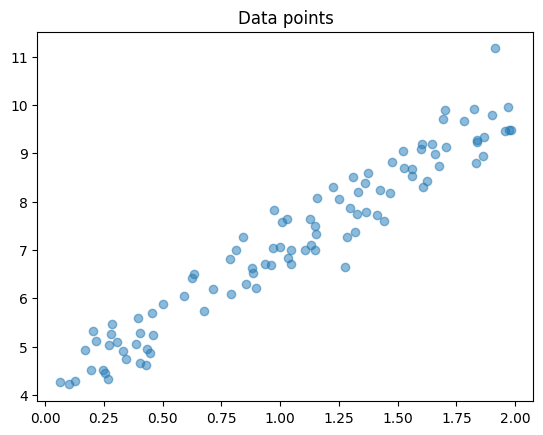

Iteration 10: Error = 0.5877412088627537
Iteration 20: Error = 0.27380187626218455
Iteration 30: Error = 0.25207403618543345
Iteration 40: Error = 0.23670266869264533
Iteration 50: Error = 0.2250196403257352
Iteration 60: Error = 0.2161353270506921
Iteration 70: Error = 0.20937926124624467
Iteration 80: Error = 0.20424161865133114
Iteration 90: Error = 0.20033470415379143
Iteration 100: Error = 0.19736369544520246
Iteration 110: Error = 0.19510439523475004
Iteration 120: Error = 0.19338631294633604
Iteration 130: Error = 0.19207979921429386
Iteration 140: Error = 0.19108626232521356
Iteration 150: Error = 0.1903307283221991
Iteration 160: Error = 0.189756183344569
Iteration 170: Error = 0.18931927126648546
Iteration 180: Error = 0.18898702197111664
Iteration 190: Error = 0.18873436337042684
Iteration 200: Error = 0.18854222942344084
Iteration 210: Error = 0.1883961213808741
Iteration 220: Error = 0.18828501368524006
Iteration 230: Error = 0.18820052196382467
Iteration 240: Error = 0.18

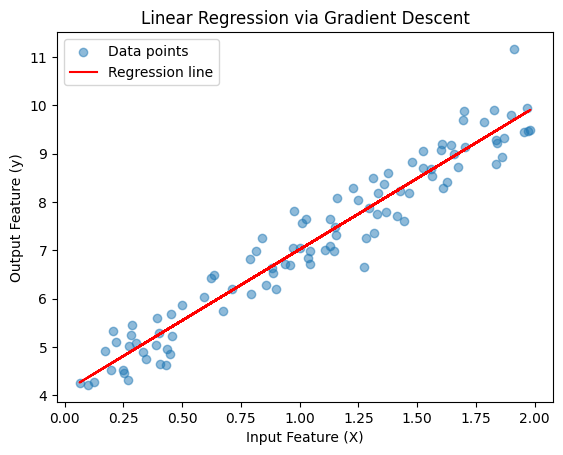

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Uncomment the line below for fixed seed
# np.random.seed(0)  # Seed ensures that generated data is the same no matter how many times the code is run

a = 0.5 # noise coefficient
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + a * np.random.randn(100, 1) # The np.random.randn() function generates some noise that creates data that isn't perfectly linear.

# Shape of X: (100, 1) -> 100 rows, 1 column (100 data points, 1 feature)
# Shape of y: (100, 1) -> 100 rows, 1 column (100 data points, 1 output per data point)

# Graph the data (this is possible since X and y are both single column matrices, i.e 1 input -> 1 output)
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.title('Data points')
plt.show()

# Initialize the weights and bias to random values
W = np.random.randn(1, 1)
b = np.random.randn()

# Shape of W: (1, 1) -> 1 row, 1 column (1 weight per feature)
# Shape of b: single scalar (1 bias term regardless of number of features or data points)

# Specify the learning rate and number of iterations (experiment with these)
learning_rate = 0.05
n_iterations = 1000

for i in range(n_iterations):
    
    # Calculate the predicted values (z = W * X + b)
    y_pred = np.dot(X, W) + b
    
    # Calculate residuals (depending on your book or resource, the residual may be calculated as y_pred - y in which case you should
    # flip the signs of any calculation involving the residual after this line to accomodate for that convention)
    residuals = y - y_pred
    
    # Calculate gradients (Note the shapes of each element in the gradient calculation)
    
    gradient_W = -2 / X.shape[0] * np.dot(X.T, residuals) # If residual is y_pred - y, then remove the - sign
    gradient_b = -2 / X.shape[0] * np.sum(residuals) # If residual is y_pred - y, then remove the - sign
    
    # 2 / x.shape[0] = 2 / 100 = 0.02: scalar
    # X.T: (1, 100) -> 1 row (1 feature), 100 columns (100 data points): a row vector
    # residuals: (100, 1) -> 100 rows (data points), 1 column (1 error value per data point): a column vector
    
    # The dot product of the residuals and X.T is a (1, 1) matrix because multiplying a (m, n) matrix by a (n, A) matrix where A is any integer,
    # results in a (m, A) matrix. In our case m = 1, n = 100, and A = 1, so the result is a (1, 1) matrix. Uncomment the line below to check!
    # print(gradient_W.shape)
        
    # Update the weights and bias (gradient descent)
    W -= learning_rate * gradient_W # W_new = W_old - learning_rate * gradient
    b -= learning_rate * gradient_b # b_new = b_old - learning_rate * gradient
    
    # Print the error function every 10 iterations
    if (i + 1) % 10 == 0:
        mse = np.mean(residuals**2)
        print(f"Iteration {i+1}: Error = {mse}")


# Use the final weights and bias to draw the line
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, np.dot(X, W) + b, color='red', label='Regression line')
plt.xlabel("Input Feature (X)")
plt.ylabel("Output Feature (y)")
plt.title("Linear Regression via Gradient Descent")
plt.legend()
plt.show()


In [15]:
# The code below illustrates the effectiveness of the numpy package for matrix operations compared to using for loops
# Give the code some time to run. With s = 500 it should take no more than 2 minutes
# With s = 1000 the number of iterations required in the for loop increase by a factor of n^3, so it may take quite a while...
import numpy as np
import time

def main():
    
    s = 500
    
    # Create two matrices of size s
    A = np.random.randn(s, s)
    B = np.random.randn(s, s)
    
    
    # Time the matrix multiplication using numpy
    start = time.time()
    
    # Use numpy to perform matrix multiplication (Strassen Algorithm O(n^2.807) + lower level optimizations + parallelization)
    C = np.matmul(A, B)
    
    # Finish timing
    end = time.time()
    
    print(f"Time taken to perform matrix multiplication using numpy: {end - start} seconds")

    # Time the matrix multiplication using for loops
    start = time.time()

    # Perform matrix multiplication naively using for loops O(n^3)
    D = np.zeros((s, s))
    for i in range(s):
        for j in range(s):
            for k in range(s):
                # Add the element-wise product of A[i, k] and B[k, j] to D[i, j]
                D[i, j] += A[i, k] * B[k, j]
                
    # Finish timing
    end = time.time()
    
    print(f"Time taken to perform matrix multiplication using for loops: {end - start} seconds")
                
    # Confirm that the results are the same (multiplying floats may lead to rounding errors, so use np.allclose instead of ==)
    if np.allclose(C, D):
        print("The results are the same!")
    else:
        print("The results are different!")
        
    return
    
if __name__ == '__main__':
    main()

Time taken to perform matrix multiplication using numpy: 0.002031087875366211 seconds
Time taken to perform matrix multiplication using for loops: 42.52544403076172 seconds
The results are the same!
